In [36]:
import pandas as pd
import seaborn as sns 
%matplotlib inline

In [2]:
carta_marina = pd.read_csv('../data/raw/escuelas-elecciones-2015-cordoba-CLEAN.csv')
resultados_elecciones = pd.read_csv('../data/processed/resultados-secciones-2015.csv')

In [3]:
resultados_elecciones.columns

Index(['Unnamed: 0', 'nombre_circuito', 'numero_mesa', 'votos_fpv',
       'votos_cambiemos', 'votos_blancos', 'votos_nulos', 'votos_recurridos',
       'total'],
      dtype='object')

In [4]:
def results_by_school(school):
    desde, hasta = school[['desde', 'hasta']].values[0]
    columns = ['votos_fpv', 'votos_cambiemos', 'votos_blancos', 'votos_nulos', 'votos_recurridos','total']
    mask = (resultados_elecciones.numero_mesa>=desde) & (resultados_elecciones.numero_mesa>=hasta)
    
    return resultados_elecciones[mask][columns].sum()

carta_marina.groupby(['seccion_nro', 'circuito_nro', 'escuela']).apply(results_by_school).head()

votos_fpv  \
seccion_nro circuito_nro escuela                                     
1           1            CENTRO EDUC.NIVEL MEDIO ADULTO     613337   
                         COL NAC DE MONSERRAT               611703   
                         ESC NUESTRA SEÑORA DEL HUERTO      612661   
                         ESC SANTA TERESA DE JESUS          611164   
            10           E.N.E.T. N°1 DR A SABATTINI        535086   

                                                         votos_cambiemos  \
seccion_nro circuito_nro escuela                                           
1           1            CENTRO EDUC.NIVEL MEDIO ADULTO          1539080   
                         COL NAC DE MONSERRAT                    1533619   
                         ESC NUESTRA SEÑORA DEL HUERTO           1536831   
                         ESC SANTA TERESA DE JESUS               1531712   
            10           E.N.E.T. N°1 DR A SABATTINI             1305645   

                                                         votos_blancos  \
seccion_nro circuito_nro escuela                                         
1           1            CENTRO EDUC.NIVEL MEDIO ADULTO          23026   
                         COL NAC DE MONSERRAT                    22901   
                         ESC NUESTRA SEÑORA DEL HUERTO           22977   
                         ESC SANTA TERESA DE JESUS               22866   
            10           E.N.E.T. N°1 DR A SABATTINI             19223   

                                                         votos_nulos  \
seccion_nro circuito_nro escuela                                       
1           1            CENTRO EDUC.NIVEL MEDIO ADULTO        32321   
                         COL NAC DE MONSERRAT                  32242   
                         ESC NUESTRA SEÑORA DEL HUERTO         32287   
                         ESC SANTA TERESA DE JESUS             32217   
            10           E.N.E.T. N°1 DR A SABATTINI           27397   

                                                         votos_recurridos  \
seccion_nro circuito_nro escuela                                            
1           1            CENTRO EDUC.NIVEL MEDIO ADULTO               650   
                         COL NAC DE MONSERRAT                         647   
                         ESC NUESTRA SEÑORA DEL HUERTO                648   
                         ESC SANTA TERESA DE JESUS                    647   
            10           E.N.E.T. N°1 DR A SABATTINI                  507   

                                                           total  
seccion_nro circuito_nro escuela                                  
1           1            CENTRO EDUC.NIVEL MEDIO ADULTO  2208414  
                         COL NAC DE MONSERRAT            2201112  
                         ESC NUESTRA SEÑORA DEL HUERTO   2205404  
                         ESC SANTA TERESA DE JESUS       2198606  
            10           E.N.E.T. N°1 DR A SABATTINI     1887858

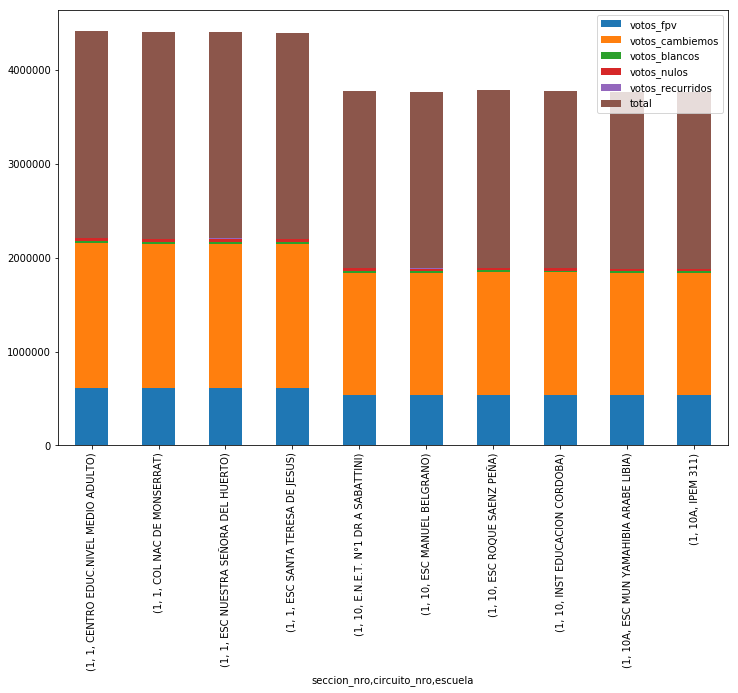

In [55]:
subset = carta_marina.groupby(['seccion_nro', 'circuito_nro', 'escuela']).apply(results_by_school)[:10]
subset.plot(kind='bar', stacked=True, figsize=(12,8))

In [50]:


seccion_nro = 1
seccion = carta_marina[carta_marina.seccion_nro == seccion_nro]
mask = resultados_elecciones.nombre_circuito.str.lstrip('0').isin(seccion.circuito_nro.str.lstrip('0').drop_duplicates().values)
subset = resultados_elecciones[mask][:10]

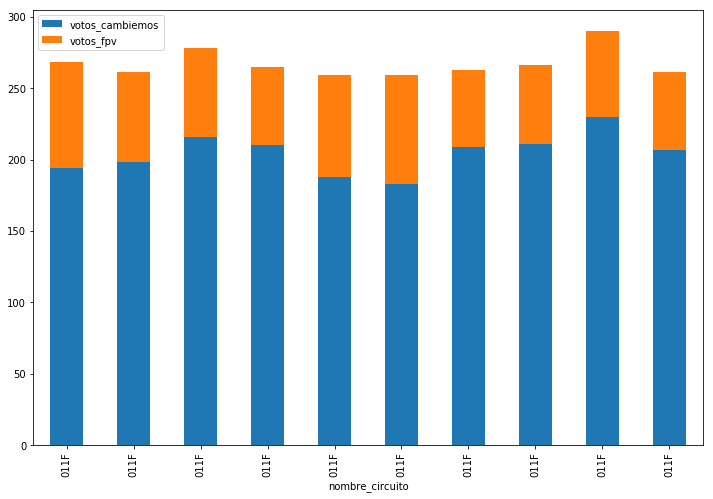

In [51]:
subset.plot(x='nombre_circuito', y=['votos_cambiemos', 'votos_fpv'], kind='bar', stacked=True, figsize=(12,8))

,Unnamed: 0,nombre_circuito,numero_mesa,votos_fpv,votos_cambiemos,votos_blancos,votos_nulos,votos_recurridos,total
